<a href="https://colab.research.google.com/github/s26673/POSI_MON1/blob/main/Kopia_Cwiczenia8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 8

## Wprowadzenie

### Jak działa KNN?

Algorytm KNN działa na zasadzie porównywania nowych danych z danymi już znanymi (tzw. treningowymi). Jego główną ideą jest to, że obiekty, które są "blisko siebie" (tzn. mają podobne cechy), są bardziej podobne do siebie i powinny być klasyfikowane w ten sam sposób. Działa to na zasadzie:

1. **Określenie liczby sąsiadów (K)** – użytkownik wybiera liczbę $ K $, czyli ile najbliższych sąsiadów należy brać pod uwagę przy klasyfikacji.
2. **Obliczanie odległości** – dla danego punktu (np. nowego przykładu, który chcemy sklasyfikować) algorytm oblicza odległość do wszystkich innych punktów w zbiorze treningowym (zwykle stosuje się metrykę Euklidesową, ale mogą to być inne odległości, jak Manhattan).
3. **Wybór K najbliższych sąsiadów** – algorytm wybiera $ K $ punktów z treningowego zbioru danych, które są najbliższe do punktu, który chcemy sklasyfikować.
4. **Klasyfikacja/średnia** – na podstawie klasy (dla klasyfikacji) lub wartości (dla regresji) $ K $ najbliższych sąsiadów, algorytm przypisuje etykietę nowemu punktowi. W przypadku klasyfikacji będzie to najczęściej najczęstsza klasa spośród $ K $ sąsiadów, a w przypadku regresji – średnia wartość.

<br>

#### Przykład:

Załóżmy, że masz zbiór danych o kwiatach, z dwoma cechami: długość i szerokość płatków. Chcesz sklasyfikować nowy kwiat. Algorytm KNN znajdzie $ K $ najbardziej podobnych kwiatów w zbiorze treningowym (np. 5 najbliższych) i przypisze nowemu kwiatowi etykietę na podstawie większości (np. "iris-setosa", jeśli 3 z 5 najbliższych są setosą).

<br>

#### Zalety i wady:

##### Zalety:
- Prosty do zrozumienia i implementacji.
- Nie wymaga treningu modelu, działa "na bieżąco".
- Może być używany do wielu typów danych (np. klasyfikacja, regresja).

##### Wady:
- **Wydajność obliczeniowa**: im większy zbiór danych, tym więcej operacji.
- **Wrażliwość na szum i nieistotne cechy.**
- Wymaga odpowiedniej metryki odległości (choć w niektórych przypadkach może być trudne do wyboru).


### Miary odległości

#### 1. Odległość Euklidesowa (Euclidean Distance)

Jest to najbardziej powszechnie stosowana metryka, szczególnie w klasycznych zadaniach klasyfikacji i regresji, gdy dane są ciągłe.

##### Wzór:

$$
d_E = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
$$

Gdzie:

- $ x_1, x_2, \dots, x_n $ to współrzędne punktu $ x $,
- $ y_1, y_2, \dots, y_n $ to współrzędne punktu $ y $,
- $ n $ to liczba wymiarów (cech).

##### Przykład:

Jeśli mamy dwa punkty w 2 wymiarach: $ x = (3, 4) $ i $ y = (7, 1) $, to odległość Euklidesowa między nimi to:

$$
d_E = \sqrt{(3 - 7)^2 + (4 - 1)^2} = \sqrt{(-4)^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5
$$

<br>

#### 2. Odległość Manhattan (Manhattan Distance)

Jest to alternatywna miara, która sumuje różnice współrzędnych punktów wzdłuż osi. Jest szczególnie użyteczna, gdy dane są zorganizowane w siatkę (np. w przypadku problemów związanych z ruchem w miastach).

##### Wzór:

$$
d_M = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_n - y_n|
$$

##### Przykład:

Dla punktów $ x = (3, 4) $ i $ y = (7, 1) $, odległość Manhattan to:

$$
d_M = |3 - 7| + |4 - 1| = 4 + 3 = 7
$$

<br>

#### 3. Odległość Minkowskiego (Minkowski Distance)

Jest ogólną formą obu powyższych metryk. Odległość Minkowskiego może przyjąć różne wartości w zależności od parametru $ p $.

##### Wzór:

$$
d_M = \left( |x_1 - y_1|^p + |x_2 - y_2|^p + \dots + |x_n - y_n|^p \right)^{1/p}
$$

Gdy $ p = 1 $, odległość Minkowskiego jest równa odległości Manhattan.

Gdy $ p = 2 $, jest to odległość Euklidesowa.

##### Przykład:

Dla punktów $ x = (3, 4) $ i $ y = (7, 1) $, jeśli $ p = 3 $:

$$
d_M = \left( |3 - 7|^3 + |4 - 1|^3 \right)^{1/3} = \left( 4^3 + 3^3 \right)^{1/3} = \left( 64 + 27 \right)^{1/3} = 91^{1/3} \approx 4.5
$$

<br>

#### Podsumowanie

W zależności od charakterystyki danych i problemu, możesz wybierać odpowiednią metrykę odległości:

- **Euklidesowa** – najczęściej stosowana w zadaniach ogólnych (ciągłe dane).
- **Manhattan** – dla danych, które dobrze opisują "ruch" w siatce.
- **Minkowski** – ogólna forma, pozwalająca na eksperymentowanie z parametrem $ p $.


## Zadanie 1
Dla zbioru danych `load_wine` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz klasyfikację cechy `target` z wykorzystaniem `KNN`. Sprawdź diałanie modelu dla różnych wartości `k-sąsiadów`. Pamiętaj o skalowaniu danych.

<br>

Przykład ładowania danych:

```
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target
```

In [3]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine = load_wine()
print(wine.DESCR)

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

print("Shape of data:", X.shape)
X.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
print("Kształt danych:", X.shape)
print(X.head())
print(X.info())
print(X.describe())

Kształt danych: (178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  pro

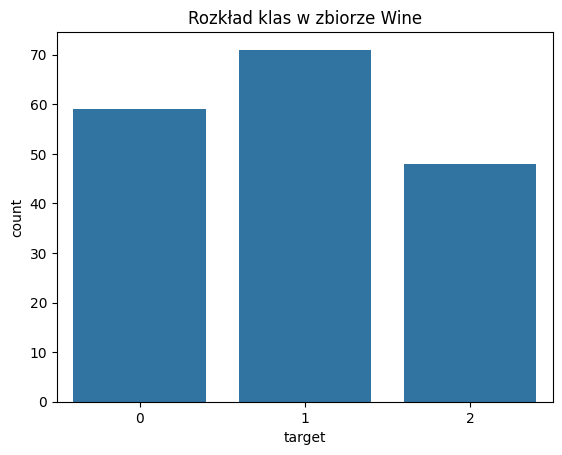

In [4]:
sns.countplot(x=y)
plt.title("Rozkład klas w zbiorze Wine")
plt.show()

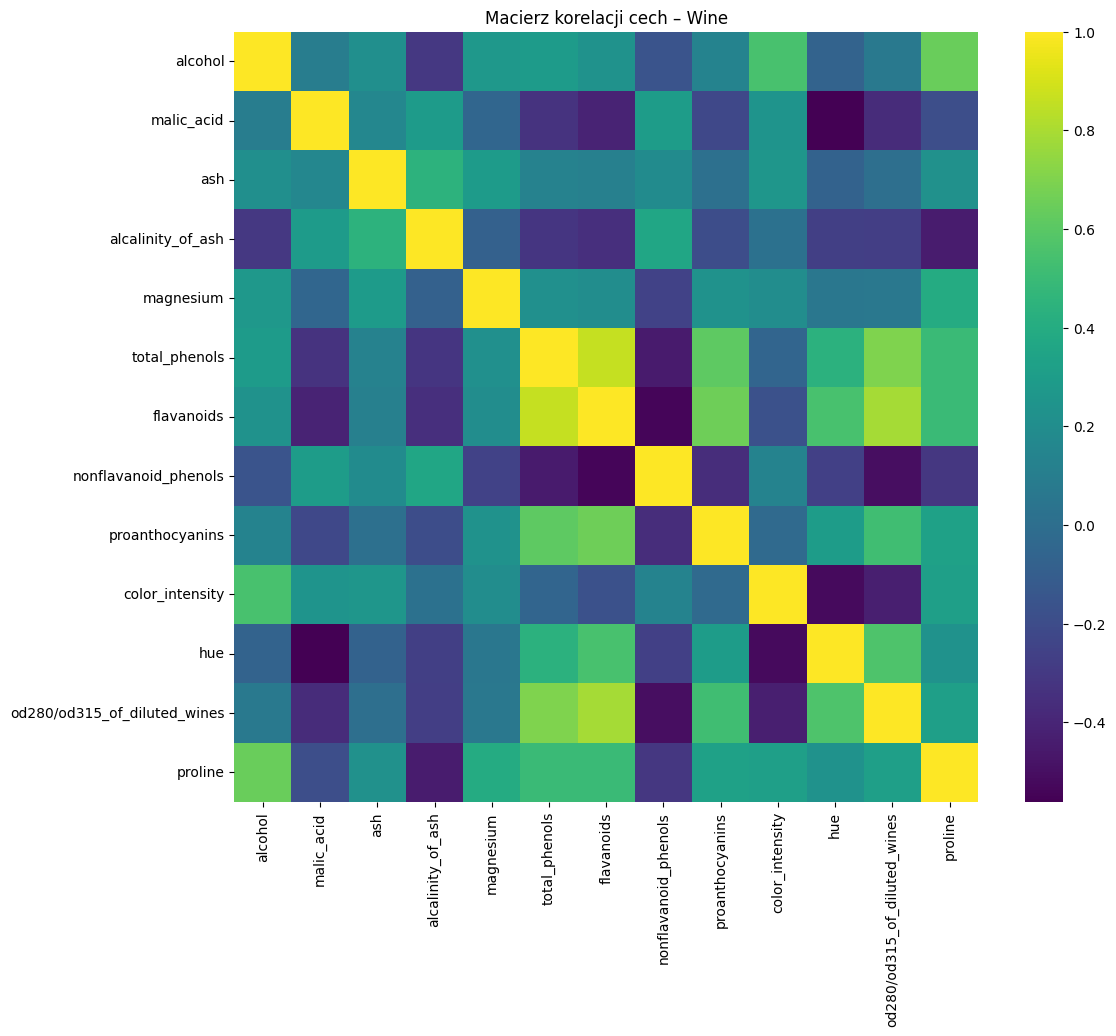

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="viridis")
plt.title("Macierz korelacji cech – Wine")
plt.show()

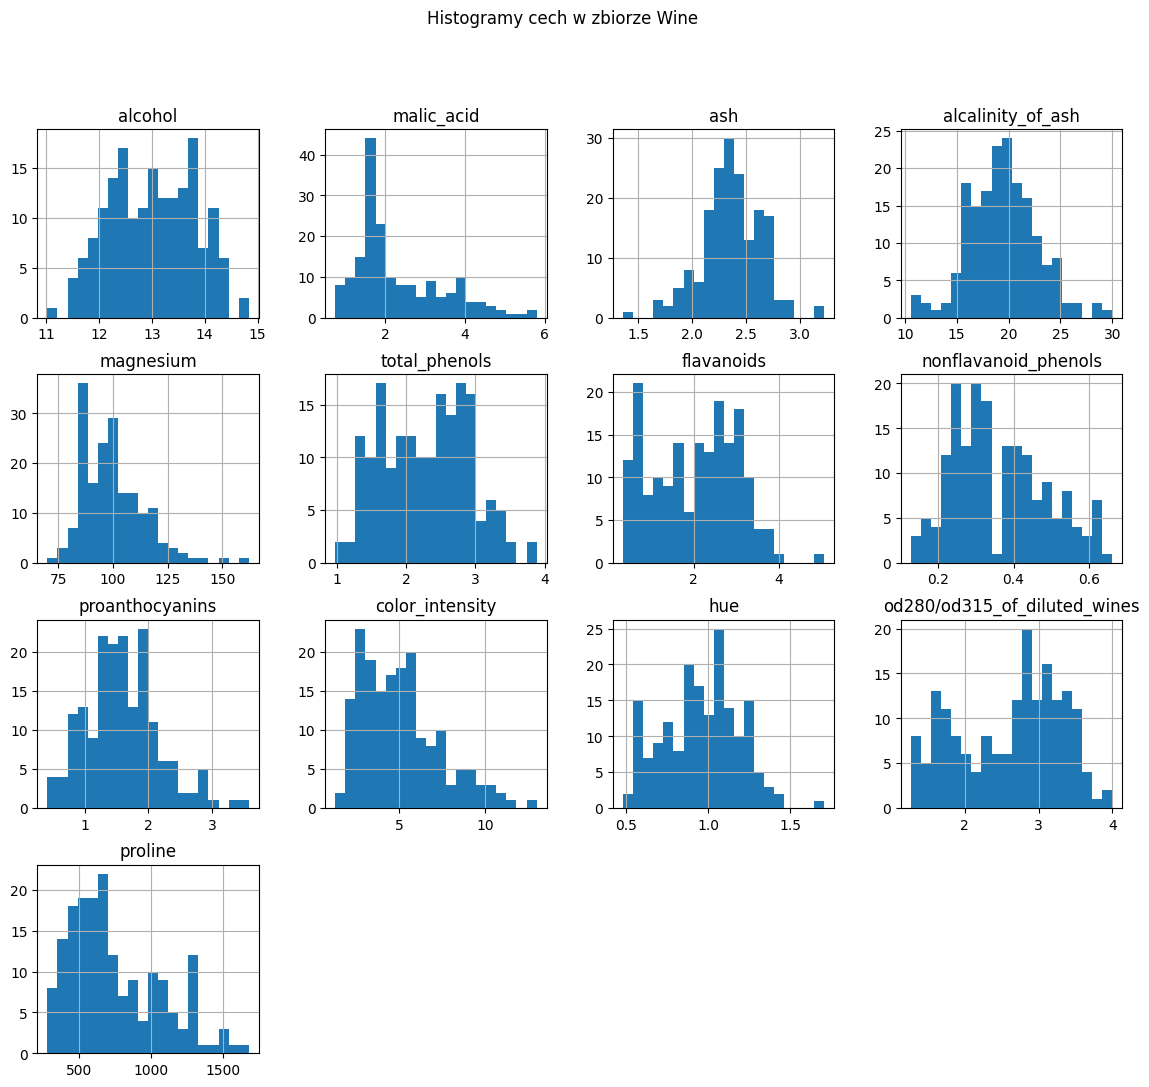

In [ ]:
X.hist(figsize=(14,12), bins=20)
plt.suptitle("Histogramy cech w zbiorze Wine")
plt.show()

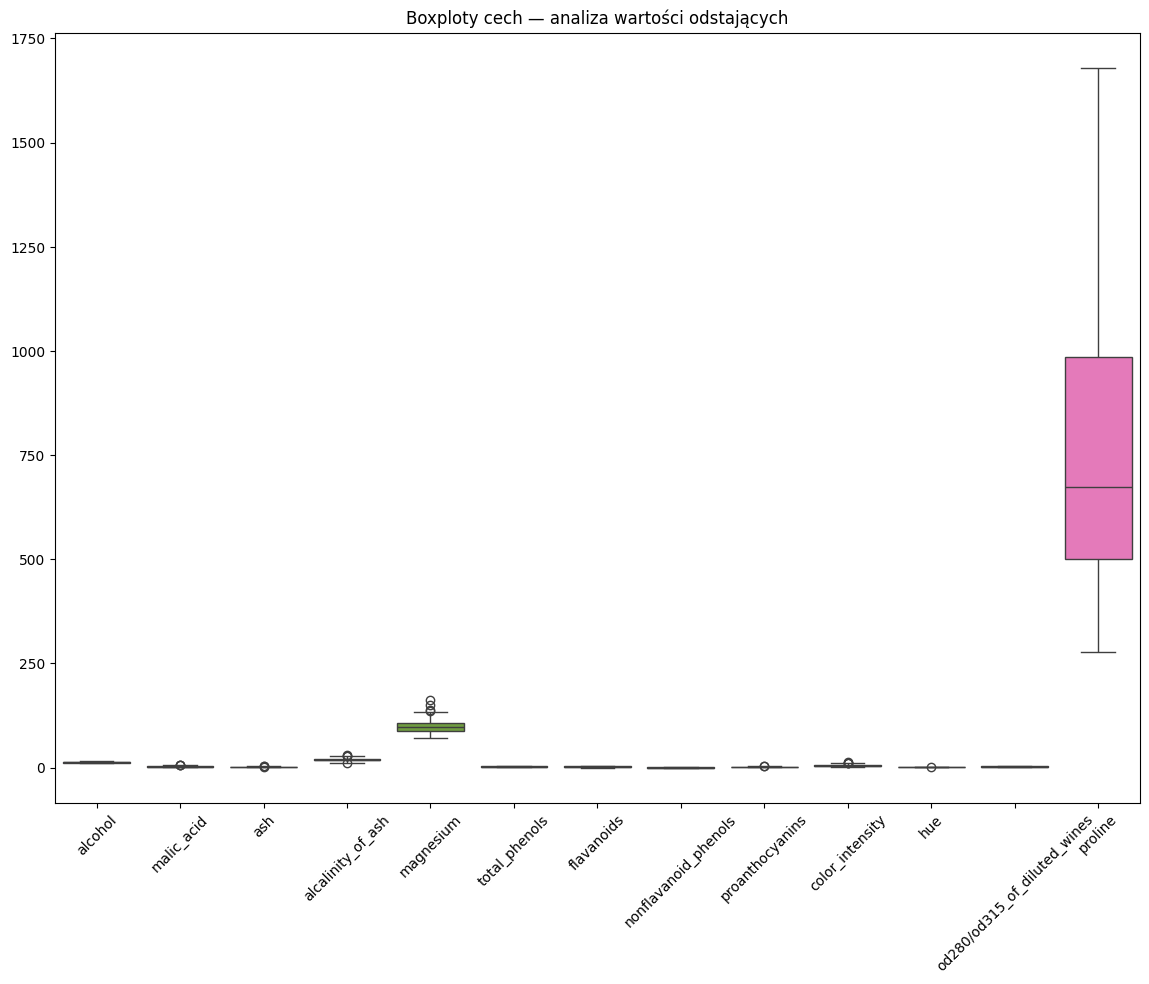

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxploty cech — analiza wartości odstających")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
Confusion Matrix:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



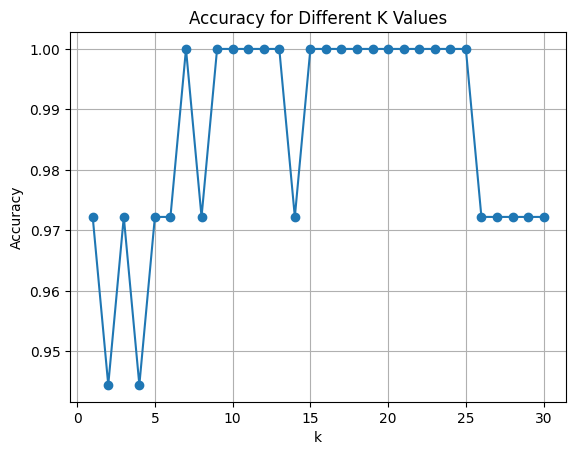

In [10]:
accuracies = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy for Different K Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [11]:
import numpy as np

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print("Best k:", best_k)
print("Best accuracy:", best_acc)

Best k: 7
Best accuracy: 1.0


Example predictions (k=1): [0 2 0 0 1 0 0 1 1 2]
Accuracy: 0.9722222222222222
Accuracy k=5: 0.9722222222222222


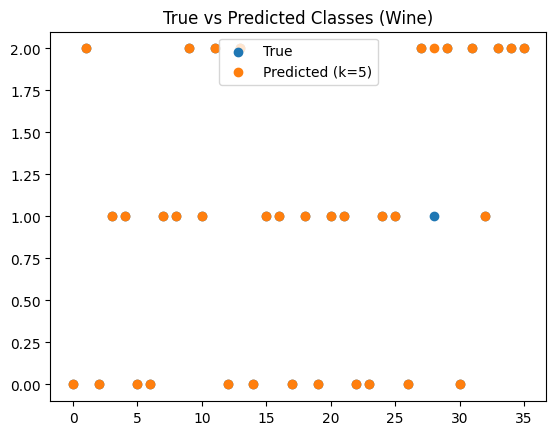

In [32]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions_k1 = knn.predict(X_test)

print("Example predictions (k=1):", predictions_k1[:10])
print("Accuracy:", accuracy_score(y_test, predictions_k1))
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
predictions_k5 = knn5.predict(X_test)

print("Accuracy k=5:", accuracy_score(y_test, predictions_k5))
plt.scatter(range(len(y_test)), y_test, label="True")
plt.scatter(range(len(predictions_k5)), predictions_k5, label="Predicted (k=5)")
plt.legend()
plt.title("True vs Predicted Classes (Wine)")
plt.show()


## Zadanie 2
Dla zbioru danych `fetch_california_housing` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz regresję z wykorzystaniem `KNN`. Sprawdź diałanie modelu dla różnych wartości `k-sąsiadów`. Pamiętaj o skalowaniu danych.

<br>

Przykład ładowania danych:

```
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target
```

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
data = fetch_california_housing()
X = data.data
y = data.target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Shape of data:", X.shape)
X.head()

Shape of data: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [17]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


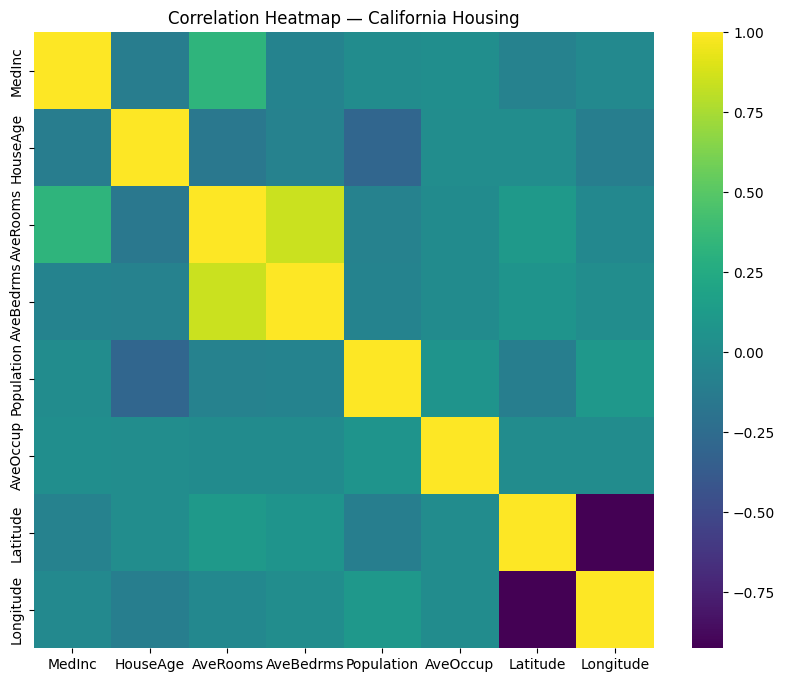

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap="viridis")
plt.title("Correlation Heatmap — California Housing")
plt.show()

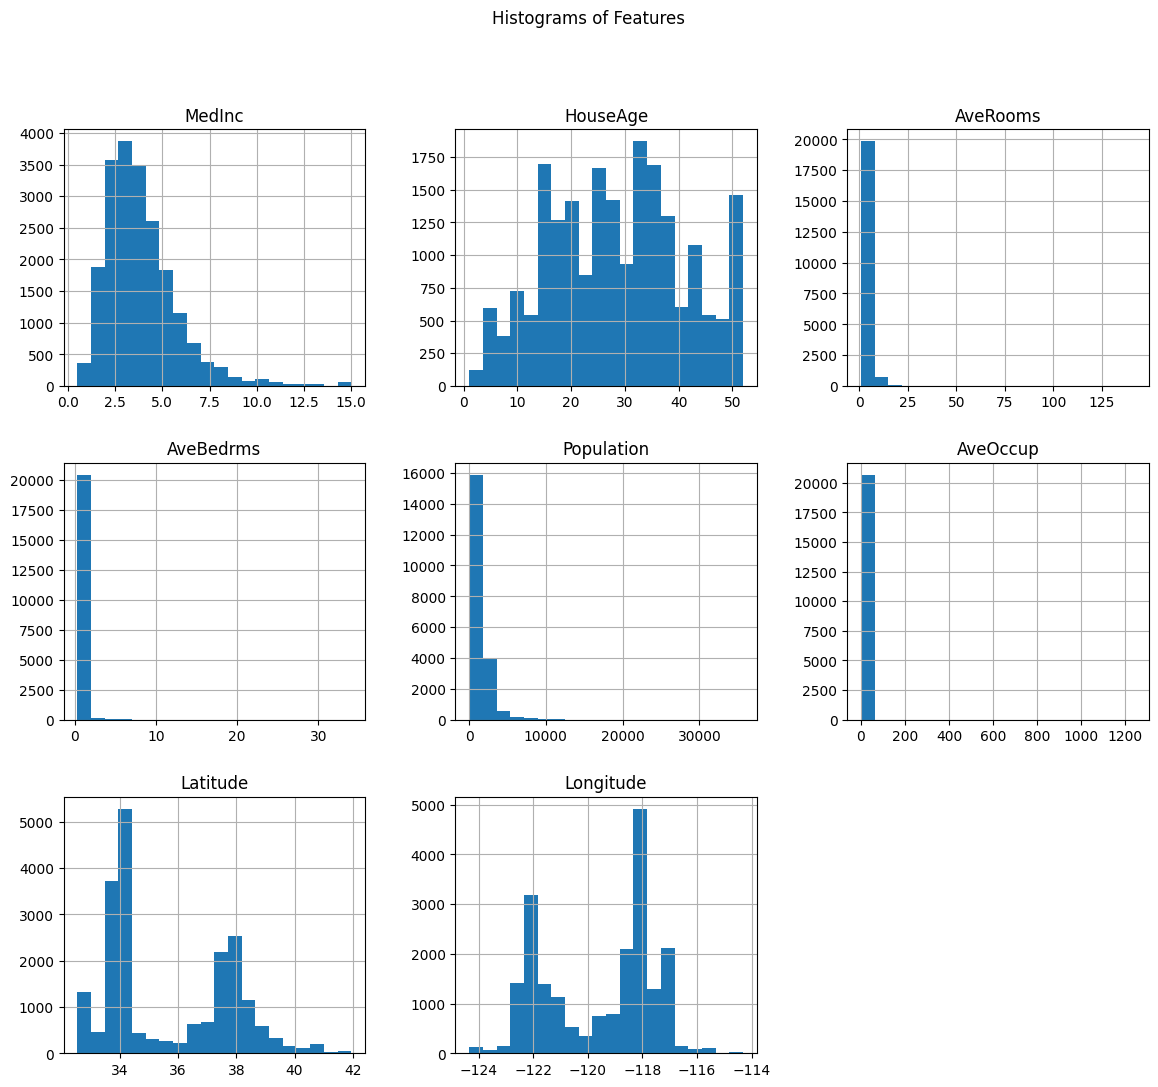

In [19]:
X.hist(figsize=(14,12), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 0.4338108260898032
RMSE: 0.6586431705330309
R2 Score: 0.6689500504856482


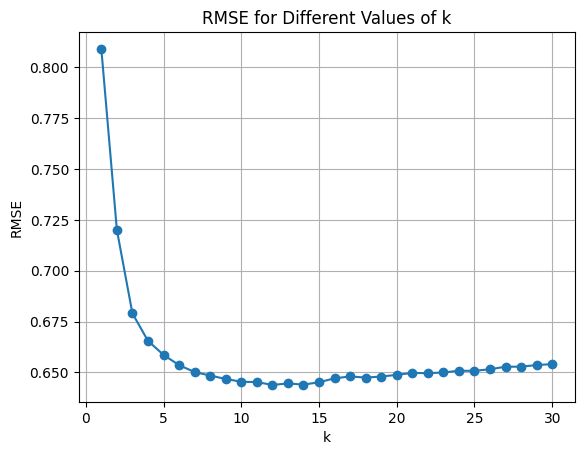

In [24]:
errors = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    rmse_k = np.sqrt(mean_squared_error(y_test, y_pred_k))
    errors.append(rmse_k)

plt.plot(k_values, errors, marker='o')
plt.title("RMSE for Different Values of k")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [25]:
best_k = k_values[errors.index(min(errors))]
best_rmse = min(errors)

print("Best k:", best_k)
print("Lowest RMSE:", best_rmse)

Best k: 12
Lowest RMSE: 0.6438652852885719


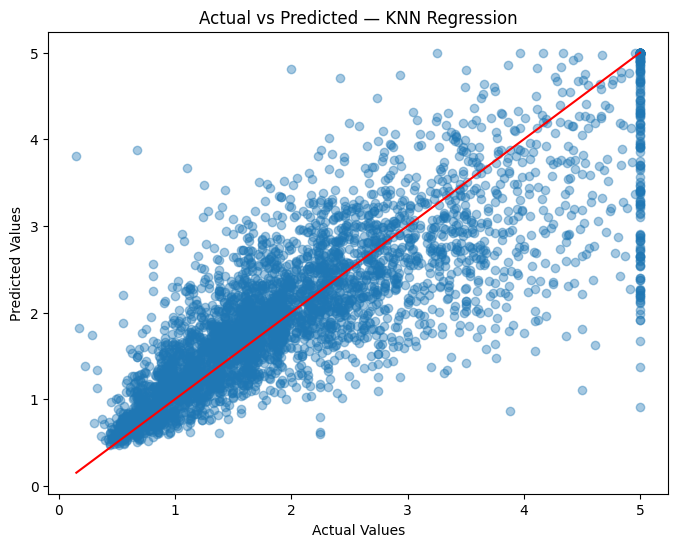

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted — KNN Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [29]:
errors = []

for k in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred_k))

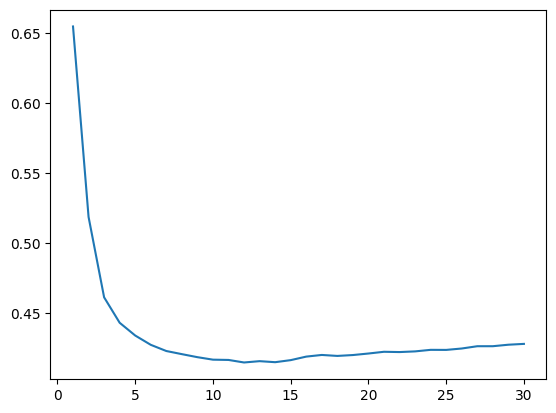

In [30]:
plt.plot(range(1,31), errors)
plt.show()